# Modern Methods of Data Analysis 3

## Random Variables
When performing observations it is essentially impossible to ban all sources of random fluctuations from the experiment (remember the thing I saied about EVERYTHING, even the measurement instrument being a quantum system and therefor susceptible to random behaviour), as a result all measurements will fluctuate. Some may only fluctuate subtily and others will fluctuate more pronounced.

A variable that is subject to such random fluctuations is called a random variable. In day to day operations however observable quantities (like the voltage from your lab power supply) that can be controlled very tightly are given without an error margin. This is done because the effect of the error is assumed to be minimal and therefor it's effect on the result is neglected for the sake of simplicity.

### Random Vectors
Most often an experiment does not only measure a single observable quantity but a variety of them. So taking a single measurement of the experiment involves reading multiple instruments. The result of a measurements is therefore no longer a number but a vector $\vec{X}$ that incorporate the readings of all instruments involved.
All operations that can be formulated for a single random variable are simply applied to each element of the vector. This gives rise to a matrix formalism for random-variable-vectors that is far more common for real experiments than analyzing each member of the vector individually. So from now on I will include a matrix formulation of all the equations where applicable.

---
### The probability density function
If two subsequent measurements $\omega$ and $\omega'$ are taken of the random variable $X$ with possible values in $S$, it is highly unlikely, that both have the same value. If many measurements are taken (into the thousands or even up to billions) regions ($x_0 \lt \omega \lt x_1$) can emerge where more measurements appear (the average distance between two neighboring measurements is small) along with regiones where less appear ($x_2 \lt \omega \lt x_3$) (the average distance between two neighboring measurements is comparatively large). The likelihood of a measurements appearing in an interval $\text{d}x$ is called the probability density. This probability density can be characterized by the *probability density function* or PDF.

The probability density is defined by:

$$ p(x) = \lim\limits_{N \rightarrow \infty}{\frac{n}{N}\mathrm{d}x}$$ where $n$ is the amount of measurements in the interval $x_0 \leq x \leq x_1$.

As the probability for measuring a value in $S$ is $P(S) = 1$ it follows that

$$ \int_{S} p(x)\,\mathrm{d}x = 1$$

for a single random variable and 

$$ \prod_{i=1}^{n} \int_{S_v} p_i(x_i) \mathrm{d}x_i = 1$$

for an $n$ dimensional vector of random variables from the set of all possible vectors $S_v$.

If $S$ is not a contiguous (as for example the results of a dice roll of an n sided die) then the above integral simplifies to a sum

$$ \sum_{x\in S} p(x) = 1$$

or a sum of summs in the case of a vector with discrete entries

$$ \sum_{x_1 \in S_1} \text{...} \sum_{x_N \in S_N} \prod_{i=1}^N p_i(x_i) = 1$$

---

## Making the PDF visible with Histograms
Using computers as we are, there is a fairly simple numerical way to approximate the PDF. This is done via a histogram. The idea of a histogram is that all measurements that fall into a specific range ($x_0 < x < x_1$) are simply counted without recording their exact value. then the amount of measurements that lie within that interval is visualized by the height of a rectangle with the base of the rectangle being the interval that the measurements lie in. This is not only done for one interval but for the entire range of measurement outcomes. A histogram looks like this

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# first lets produce some (1000) random numbers in the domain [0, 1)
rand_nums = np.random.rand(1000)
# lets define the edges of the intervals that the numbers should be grouped in
bin_edges = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0]
#now lets produce a histogram from the numbers
hist, bins = np.histogram(rand_nums, bin_edges)
print("Counts per interval: {}".format(hist))
print("Edges of the intervals: {}".format(bins))

Counts per interval: [106 101  90 102  97 111 209  92  92]
Edges of the intervals: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.8 0.9 1. ]


As you can see, the bin from 0.6 to 0.8 is twice as wide as all the other bins and there also where about twice as many random numbers in that interval. From this we can deduce, that the PDF of the random numbers is likely a constant function. This sort of distribution is called a *uniform distribution*. Let's now plot the histogram

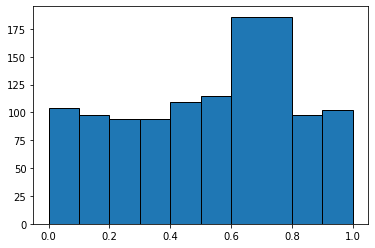

In [16]:
h, b, p = plt.hist(bin_edges[:-1], bin_edges, weights=hist, edgecolor='black') # The result of this function is prevented from being printed by writing it to variables

If we sum up all the entries in all the intervals (that are called **bins** of a histogram) we should get back the total number of measurements

In [11]:
sum(hist)

1000.0

As you can see, the visualisation is a bit misleading in terms of showing that the PDF is a uniform function. This is because for an interval twice as wide as the rest, we get twice as many counts producing an area that is four times the size it should actually be. To correct for this the height of a bin has to be divided by it's with, so that the factors don't compund but instead cancel each other out.

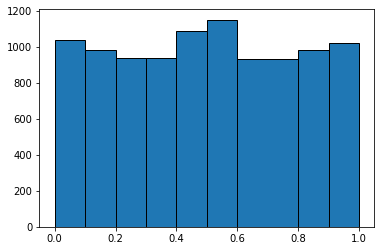

In [24]:
# calculate the width of the bins
bin_width = [left_edge - right_edge for left_edge, right_edge in zip(bin_edges[1:],bin_edges[:-1])]

# correct the correlation between height and width
corrected_hist = [count/width for count, width in zip(hist, bin_width)]

#plot the corrected hist
h, b, p = plt.hist(bin_edges[:-1], bin_edges, weights=corrected_hist, edgecolor='black')

However you can now see, that instead of the number of measurements within any given bin, we now have a number close to the total number of events as the height on each bin so we need to come up with some sort of measure to give the number on the y-axis some meaning (as it currently needs a rather convoluted explanation).

The solution to this problem is to plot the **probability density** instead of the number of counts in each bin. This can be done in the following way 

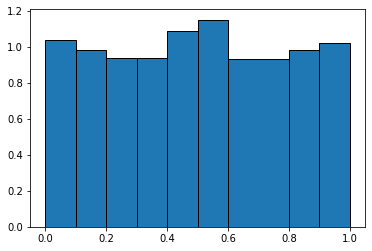

In [27]:
# calculate the density for each bin
relative_count = [count/sum(hist) for count in hist]

# now do the correction for the bin width, just as before
probability_density = [rel_cnt/width for rel_cnt, width in zip(relative_count, bin_width)]

#plot a histogram approximation of the probability density
h, b, p = plt.hist(bin_edges[:-1], bin_edges, weights=probability_density, edgecolor='black')

Now that we have computed the probability density the relative amount of measurements in each bin is the area of the rectangle drawn over the interval of the corresponding bin. This makes it possible to quickly comprehend the shape of a PDF without much effort. (as this is used very often the `plt.hist` function offers the keyword argument `density` that when set to `true` converts the histogram to show the PDF by the process described above).

And now just for fun lets look at a histogram of a gaussian (also called **normal**) distribution (you will encounter this type of distribution very often). As you will undoublty be able to see, the top edges of the histogram follow the refernce function very closely. 

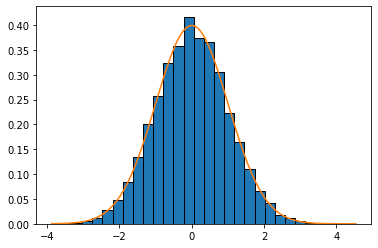

In [37]:
# generate some random numbers following the 'normal' distributed
mu = 0
sigma = 1
normal_rand_nums = np.random.randn(10000) * sigma + mu
# calculate and plot the normalized histogram
h, b, p = plt.hist(normal_rand_nums, bins=30, density=True, edgecolor='black')

# plot the function as a reference
x = np.linspace(min(b), max(b), 1000)
l = plt.plot(x, st.norm.pdf(x))

---
### Sampeling a random variable
In the abstract an experiment is the set of circumstances needed to generate a probability density funciton (a multidimensional one when multiple readings are involved) for the observed quantities. Then the probability density function is interpreted and "laws of nature" are deduced from that. The only way to truly get the probability density is to perform infinite measurements, which, needless to say, is impossible. So instead a **Sample** is taken of the probability density function and these samples are then used to approximate the PDF with the help of models. A sample is nothing more than a group of measurements taken from the PDF. An experiment can have many different parameters that have to be set before taking a sample and the set of parameters that 

## Expectation values, means and other Estimators

The defining characteristic of a random variable is its probability density function. However as a rule the PDF is not known and has to be guessed at with the help of models. However there are a few indicators (or estimators) that can give you an Idea of how a PDF looks like based on a sample drawn form it.